In [4]:
# Packages used
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
sns.set()
%matplotlib inline

import math
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from pmdarima.arima.stationarity import ADFTest, KPSSTest, PPTest
from pmdarima.arima.utils import ndiffs, nsdiffs


from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA


from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error



import warnings
warnings.filterwarnings("ignore")

from kats.consts import TimeSeriesData
from kats.detectors.seasonality import FFTDetector
from kats.detectors.seasonality import ACFDetector
from kats.tsfeatures.tsfeatures import TsFeatures


from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from pandas.plotting import autocorrelation_plot

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

import dash
import dash_bootstrap_components as dbc
import dash_core_components as dcc
from jupyter_dash import JupyterDash
import dash_html_components as html

import plotly.graph_objs as go
import plotly.graph_objects as go
from dash.dependencies import Input, Output
from datetime import date
import plotly.express as px



In [5]:
# Set dimensions for printing
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 100)
pd.set_option('display.max_colwidth', None)

In [6]:
df = pd.read_csv('/home/samuel/Documents/First Semester/presentation_class/windturbine.csv', header=0 , parse_dates=[0])

In [7]:
df.head()

Unnamed: 0  ActivePower  AmbientTemperatue  BearingShaftTemperature  \
0 2017-12-31 00:00:00+00:00          NaN                NaN                      NaN   
1 2017-12-31 00:10:00+00:00          NaN                NaN                      NaN   
2 2017-12-31 00:20:00+00:00          NaN                NaN                      NaN   
3 2017-12-31 00:30:00+00:00          NaN                NaN                      NaN   
4 2017-12-31 00:40:00+00:00          NaN                NaN                      NaN   

   Blade1PitchAngle  Blade2PitchAngle  Blade3PitchAngle  ControlBoxTemperature  \
0               NaN               NaN               NaN                    NaN   
1               NaN               NaN               NaN                    NaN   
2               NaN               NaN               NaN                    NaN   
3               NaN               NaN               NaN                    NaN   
4               NaN               NaN               NaN                    NaN   

   GearboxBearingTemperature  GearboxOilTemperature  GeneratorRPM  GeneratorWinding1Temperature  \
0                        NaN                    NaN           NaN                           NaN   
1                        NaN                    NaN           NaN                           NaN   
2                        NaN                    NaN           NaN                           NaN   
3                        NaN                    NaN           NaN                           NaN   
4                        NaN                    NaN           NaN                           NaN   

   GeneratorWinding2Temperature  HubTemperature  MainBoxTemperature  NacellePosition  \
0                           NaN             NaN                 NaN              NaN   
1                           NaN             NaN                 NaN              NaN   
2                           NaN             NaN                 NaN              NaN   
3                           NaN             NaN                 NaN              NaN   
4                           NaN             NaN                 NaN              NaN   

   ReactivePower  RotorRPM  TurbineStatus  WTG  WindDirection  WindSpeed  
0            NaN       NaN            NaN  G01            NaN        NaN  
1            NaN       NaN            NaN  G01            NaN        NaN  
2            NaN       NaN            NaN  G01            NaN        NaN  
3            NaN       NaN            NaN  G01            NaN        NaN  
4            NaN       NaN            NaN  G01            NaN        NaN

In [8]:
# Getting data info and properties

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116152 entries, 0 to 116151
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype              
---  ------                        --------------   -----              
 0   Unnamed: 0                    116152 non-null  datetime64[ns, UTC]
 1   ActivePower                   92688 non-null   float64            
 2   AmbientTemperatue             91917 non-null   float64            
 3   BearingShaftTemperature       60619 non-null   float64            
 4   Blade1PitchAngle              39934 non-null   float64            
 5   Blade2PitchAngle              39829 non-null   float64            
 6   Blade3PitchAngle              39829 non-null   float64            
 7   ControlBoxTemperature         60263 non-null   float64            
 8   GearboxBearingTemperature     60641 non-null   float64            
 9   GearboxOilTemperature         60538 non-null   float64            
 10  GeneratorRPM        

In [9]:
# Inspecting the possibility of white spaces before renaming the first column
df.columns

Index(['Unnamed: 0', 'ActivePower', 'AmbientTemperatue', 'BearingShaftTemperature',
       'Blade1PitchAngle', 'Blade2PitchAngle', 'Blade3PitchAngle', 'ControlBoxTemperature',
       'GearboxBearingTemperature', 'GearboxOilTemperature', 'GeneratorRPM',
       'GeneratorWinding1Temperature', 'GeneratorWinding2Temperature', 'HubTemperature',
       'MainBoxTemperature', 'NacellePosition', 'ReactivePower', 'RotorRPM', 'TurbineStatus',
       'WTG', 'WindDirection', 'WindSpeed'],
      dtype='object')

In [10]:
## Rename time index as 'timestamp'
df.columns = ['timestamp', 'ActivePower', 'AmbientTemperatue', 'BearingShaftTemperature',
       'Blade1PitchAngle', 'Blade2PitchAngle', 'Blade3PitchAngle', 'ControlBoxTemperature',
       'GearboxBearingTemperature', 'GearboxOilTemperature', 'GeneratorRPM',
       'GeneratorWinding1Temperature', 'GeneratorWinding2Temperature', 'HubTemperature',
       'MainBoxTemperature', 'NacellePosition', 'ReactivePower', 'RotorRPM', 'TurbineStatus',
       'WTG', 'WindDirection', 'WindSpeed']

In [11]:
df.head()

timestamp  ActivePower  AmbientTemperatue  BearingShaftTemperature  \
0 2017-12-31 00:00:00+00:00          NaN                NaN                      NaN   
1 2017-12-31 00:10:00+00:00          NaN                NaN                      NaN   
2 2017-12-31 00:20:00+00:00          NaN                NaN                      NaN   
3 2017-12-31 00:30:00+00:00          NaN                NaN                      NaN   
4 2017-12-31 00:40:00+00:00          NaN                NaN                      NaN   

   Blade1PitchAngle  Blade2PitchAngle  Blade3PitchAngle  ControlBoxTemperature  \
0               NaN               NaN               NaN                    NaN   
1               NaN               NaN               NaN                    NaN   
2               NaN               NaN               NaN                    NaN   
3               NaN               NaN               NaN                    NaN   
4               NaN               NaN               NaN                    NaN   

   GearboxBearingTemperature  GearboxOilTemperature  GeneratorRPM  GeneratorWinding1Temperature  \
0                        NaN                    NaN           NaN                           NaN   
1                        NaN                    NaN           NaN                           NaN   
2                        NaN                    NaN           NaN                           NaN   
3                        NaN                    NaN           NaN                           NaN   
4                        NaN                    NaN           NaN                           NaN   

   GeneratorWinding2Temperature  HubTemperature  MainBoxTemperature  NacellePosition  \
0                           NaN             NaN                 NaN              NaN   
1                           NaN             NaN                 NaN              NaN   
2                           NaN             NaN                 NaN              NaN   
3                           NaN             NaN                 NaN              NaN   
4                           NaN             NaN                 NaN              NaN   

   ReactivePower  RotorRPM  TurbineStatus  WTG  WindDirection  WindSpeed  
0            NaN       NaN            NaN  G01            NaN        NaN  
1            NaN       NaN            NaN  G01            NaN        NaN  
2            NaN       NaN            NaN  G01            NaN        NaN  
3            NaN       NaN            NaN  G01            NaN        NaN  
4            NaN       NaN            NaN  G01            NaN        NaN

In [12]:
#Remove timezone from timestamp
df['timestamp'] = df['timestamp'].dt.tz_localize(None)

In [13]:
# Make timestamp index and index data to start from January 2018

df = df.set_index('timestamp')
dfCM = df.loc['2018-01-01 00:00:00':]

In [14]:
dfCM.head()

ActivePower  AmbientTemperatue  BearingShaftTemperature  Blade1PitchAngle  \
timestamp                                                                                        
2018-01-01 00:00:00    -5.357727          23.148729                      NaN               NaN   
2018-01-01 00:10:00    -5.822360          23.039754                      NaN               NaN   
2018-01-01 00:20:00    -5.279409          22.948703                      NaN               NaN   
2018-01-01 00:30:00    -4.648054          22.966851                      NaN               NaN   
2018-01-01 00:40:00    -4.684632          22.936520                      NaN               NaN   

                     Blade2PitchAngle  Blade3PitchAngle  ControlBoxTemperature  \
timestamp                                                                        
2018-01-01 00:00:00               NaN               NaN                    NaN   
2018-01-01 00:10:00               NaN               NaN                    NaN   
2018-01-01 00:20:00               NaN               NaN                    NaN   
2018-01-01 00:30:00               NaN               NaN                    NaN   
2018-01-01 00:40:00               NaN               NaN                    NaN   

                     GearboxBearingTemperature  GearboxOilTemperature  GeneratorRPM  \
timestamp                                                                             
2018-01-01 00:00:00                        NaN                    NaN           NaN   
2018-01-01 00:10:00                        NaN                    NaN           NaN   
2018-01-01 00:20:00                        NaN                    NaN           NaN   
2018-01-01 00:30:00                        NaN                    NaN           NaN   
2018-01-01 00:40:00                        NaN                    NaN           NaN   

                     GeneratorWinding1Temperature  GeneratorWinding2Temperature  HubTemperature  \
timestamp                                                                                         
2018-01-01 00:00:00                           NaN                           NaN             NaN   
2018-01-01 00:10:00                           NaN                           NaN             NaN   
2018-01-01 00:20:00                           NaN                           NaN             NaN   
2018-01-01 00:30:00                           NaN                           NaN             NaN   
2018-01-01 00:40:00                           NaN                           NaN             NaN   

                     MainBoxTemperature  NacellePosition  ReactivePower  RotorRPM  TurbineStatus  \
timestamp                                                                                          
2018-01-01 00:00:00                 NaN         8.000000      -9.960830       NaN            NaN   
2018-01-01 00:10:00                 NaN       300.428571      -9.628441       NaN            NaN   
2018-01-01 00:20:00                 NaN       340.000000      -9.491235       NaN            NaN   
2018-01-01 00:30:00                 NaN       345.000000      -9.856136       NaN            NaN   
2018-01-01 00:40:00                 NaN       345.000000      -9.745593       NaN            NaN   

                     WTG  WindDirection  WindSpeed  
timestamp                                           
2018-01-01 00:00:00  G01       8.000000   2.279088  
2018-01-01 00:10:00  G01     300.428571   2.339343  
2018-01-01 00:20:00  G01     340.000000   2.455610  
2018-01-01 00:30:00  G01     345.000000   2.026754  
2018-01-01 00:40:00  G01     345.000000   1.831420

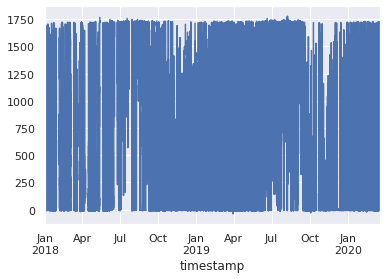

In [15]:
# Viewing our dataset
dfCM['ActivePower'].plot()
plt.show()

#### There is a need to have an expanded view of the figure to see if pattern exists

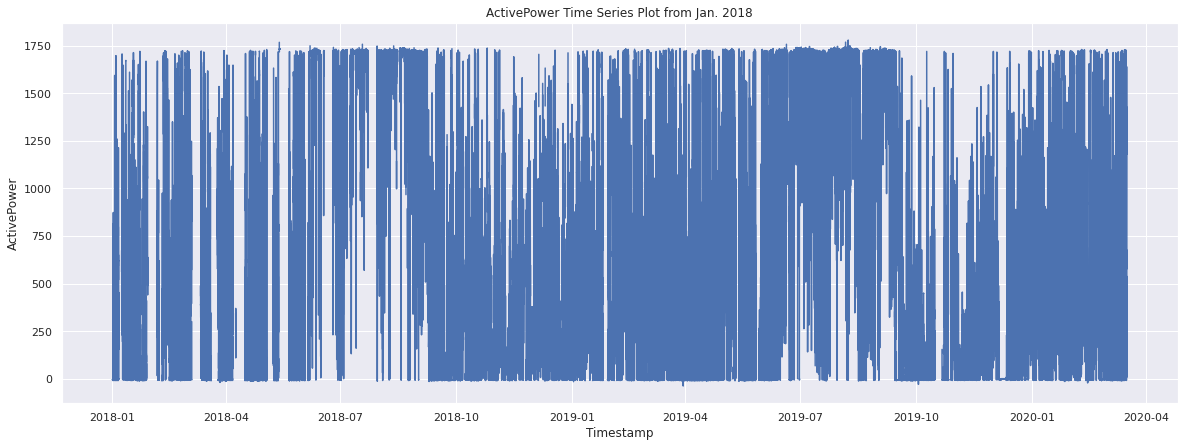

In [16]:
# Expanded view of the figure
plt.figure(figsize=(20, 7))
plt.plot(dfCM['ActivePower'])
plt.ylabel('ActivePower')
plt.xlabel('Timestamp')
plt.title('ActivePower Time Series Plot from Jan. 2018')
plt.show()

#### The view above, though appears better than the previous, but it still does not give an idea of the structure or pattern in the data

- We therefore aggregate **hourly**

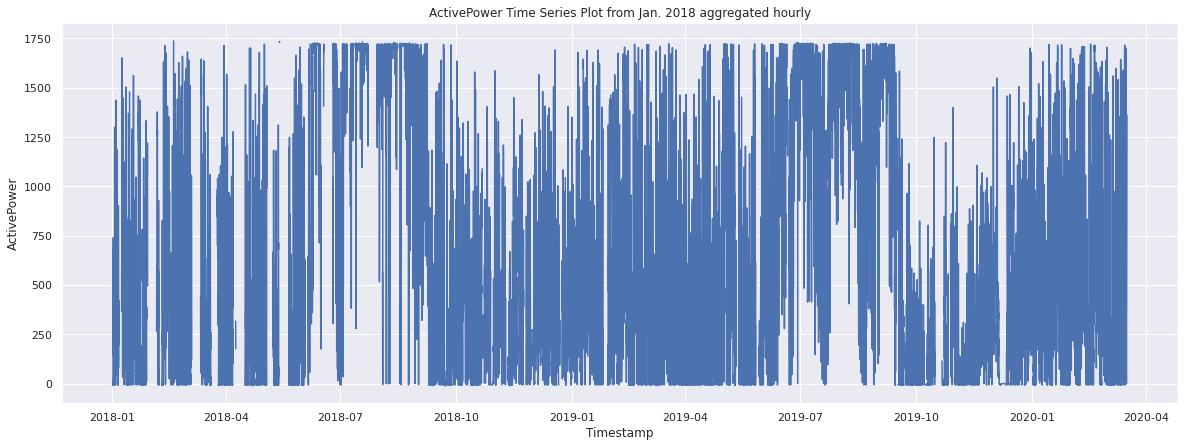

In [17]:
#Group by Hour
dataH = dfCM[['ActivePower']]
dataH = dataH.groupby([pd.Grouper(freq='H')]).mean()
plt.figure(figsize=(20, 7))
plt.plot(dataH['ActivePower'])
plt.ylabel('ActivePower')
plt.xlabel('Timestamp')
plt.title('ActivePower Time Series Plot from Jan. 2018 aggregated hourly')
plt.show()

#### The view here gives an idea of the patterns inherent in the data and also shows some missing values

- Next, we aggregate by **day**.

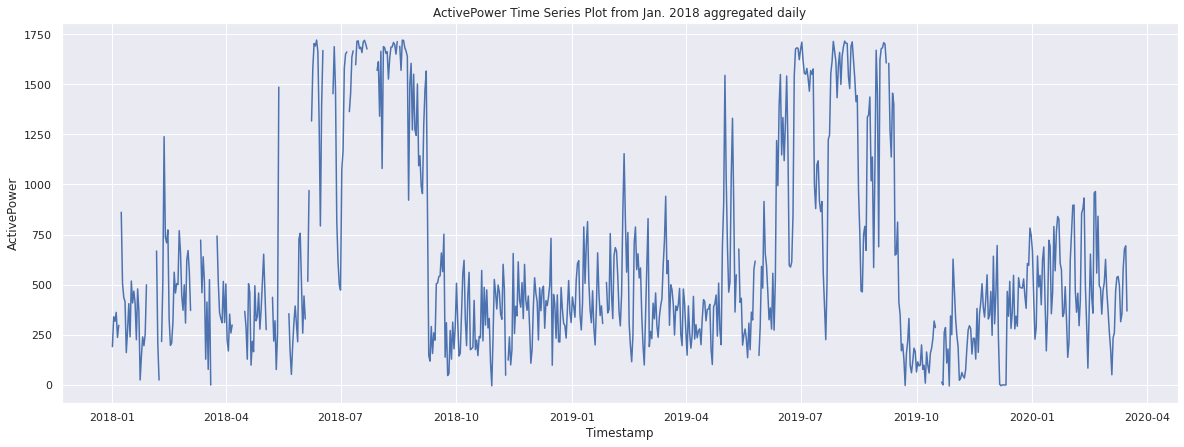

In [18]:
#Group by Day
dataD = dfCM[['ActivePower']]
dataD = dataD.groupby([pd.Grouper(freq='D')]).mean()
plt.figure(figsize=(20, 7))
plt.plot(dataD['ActivePower'])
plt.ylabel('ActivePower')
plt.xlabel('Timestamp')
plt.title('ActivePower Time Series Plot from Jan. 2018 aggregated daily')
plt.show()

#### Patterns in the data is now very much obvious and we can also see some missing value. Also, our aim is to predict daily ActivePower for the next seven days

- In what follows next, we fill missing values with **moving average**.
- Why are there missing values? 
- Why is missing values more prominent around the first quarter of the data

In [19]:
# A quick check of the data
dataD.describe()

ActivePower
count   737.000000
mean    620.371150
std     488.836712
min      -5.488917
25%     282.604120
50%     458.637504
75%     773.223933
max    1720.200880

In [20]:
#Total missing values
dataD.isnull().sum()

ActivePower    69
dtype: int64

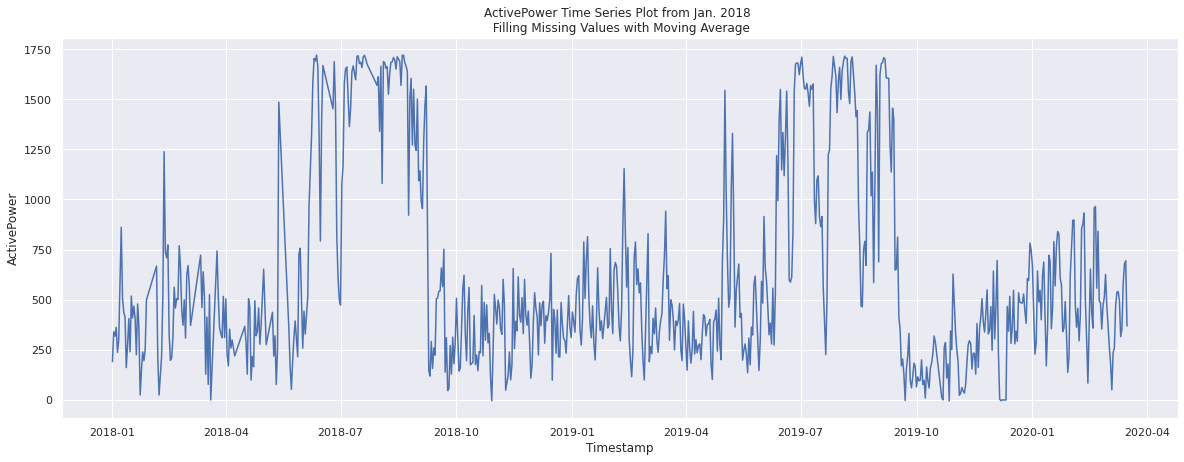

In [21]:
#Fill missing value with moving average of values
dd = dataD.interpolate()
dd = dd.fillna(method='bfill')
plt.figure(figsize=(20, 7))
plt.plot(dd)
plt.ylabel('ActivePower')
plt.xlabel('Timestamp')
plt.title('ActivePower Time Series Plot from Jan. 2018 \n Filling Missing Values with Moving Average')
plt.show()

In [22]:
dd

ActivePower
timestamp              
2018-01-01   190.815478
2018-01-02   339.470285
2018-01-03   317.517653
2018-01-04   361.856700
2018-01-05   236.783611
...                 ...
2020-03-12   353.652089
2020-03-13   580.446919
2020-03-14   677.050456
2020-03-15   693.703663
2020-03-16   368.582998

[806 rows x 1 columns]

In [23]:
dd.head(10)

ActivePower
timestamp              
2018-01-01   190.815478
2018-01-02   339.470285
2018-01-03   317.517653
2018-01-04   361.856700
2018-01-05   236.783611
2018-01-06   297.524481
2018-01-07   579.395804
2018-01-08   861.267127
2018-01-09   507.536877
2018-01-10   436.331350

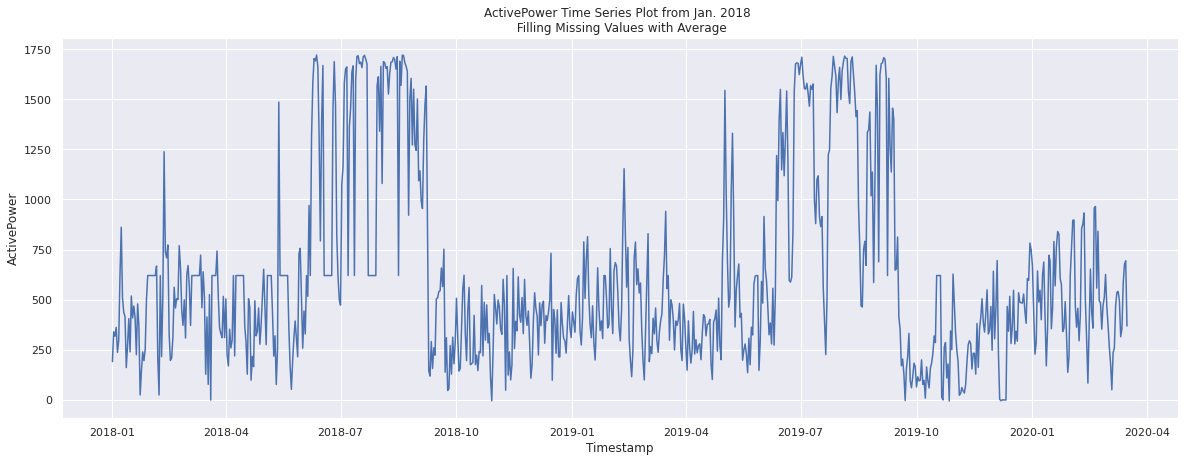

In [24]:
#Filling Missing Values with Average
avg = float(dataD[~np.isnan(dataD)].mean())
dd_avg = dataD.fillna(avg)
plt.figure(figsize=(20, 7))
plt.plot(dd_avg)
plt.ylabel('ActivePower')
plt.xlabel('Timestamp')
plt.title('ActivePower Time Series Plot from Jan. 2018 \n Filling Missing Values with Average')
plt.show()

#### It appears filling missing values with average does not give a realistic behaviour of the sequence of the ActivePower

#### Next we check which model fits and performs best in **SARIMA**, **Holt - Winters(HW)** and **LSTM**


##### Using **SARIMA**

**SARIMA(p,d,q)(P,D,Q,s)**
- p = model autoregressive order  
- d = differencing degree
- q = model moving average order

- P = seasonal autoregressive order
- D = seasonal differencing term
- Q = seasonal moving average term
- s = seasonal period

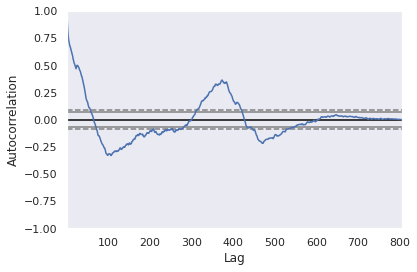

In [25]:
# How to obtain 'p'
autocorrelation_plot(dd['ActivePower']);


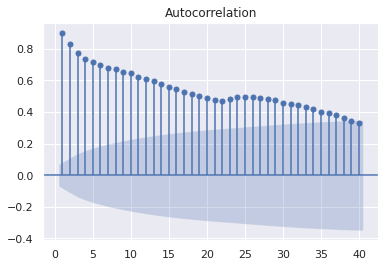

In [28]:
# Here we limit the lag to only 40
plot_acf(dd['ActivePower'], lags=40, zero=False)
plt.show()

#### This acf plot above establishes a dependence of the lag values. The ACF values(up to 37) are also significantly different from zero

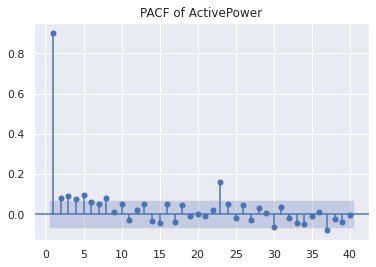

In [29]:
plot_pacf(dd['ActivePower'], lags=40, zero=False)
plt.title("PACF of ActivePower", size=12)
plt.show()

In [30]:
# How to find 'd'
adf_test = ADFTest(alpha=0.05)
p_val, should_diff = adf_test.should_diff(dd['ActivePower'])  # (0.01, False)
print('p_val:', p_val)
print('should_diff:', should_diff)


p_val: 0.09316167780903188
should_diff: True


In [31]:
# Estimate the number of differences using an ADF test:
n_adf = ndiffs(dd['ActivePower'], test='adf')  # -> 0
print('n_adf:', n_adf)

n_adf: 1


In [32]:
# estimate number of seasonal differences (D) using a Canova-Hansen test
n_D = nsdiffs(dd['ActivePower'],
            m=403,  # commonly requires knowledge of dataset
            max_D=12,
            test='ch')  # -> 0
print(n_D)

0


In [33]:
# or use the OCSB test (by default)
nsdiffs(dd['ActivePower'],
        m=403,
        max_D=12,
        test='ocsb')  # -> 0

0

- With the values of the constant we obtained we can 'grid search' the remaining values using autoarima.

**SARIMA(p,d,q)(P,D,Q,s)**

##### Using **HW**

- Holt - Winters works best if we there is seasonality and trend in the data.
- We can detect trend and seasonality.
- Trend is found using a combination of ADF and KPSS tests.
- We find seasonality automatically using the kats package from meta.
- The package detects **possible** seasonality in the series by transforming the data from time domain to frequency domain where noise would have been reduced or removed. Then it returns the length of the period in order of their spectral frequency 

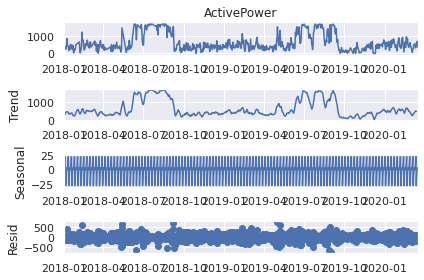

In [34]:
result_a = seasonal_decompose(dd['ActivePower'], model='additive')
result_a.plot()
plt.show()

#### From the decomposition above, it is clear that these is no trend in the data but there appears to be seasonality.
- From this, Holt-Winters appear to be a candidate model to train the data.
- Seasonality has been establish, but the seasonal period needs to be obtained.

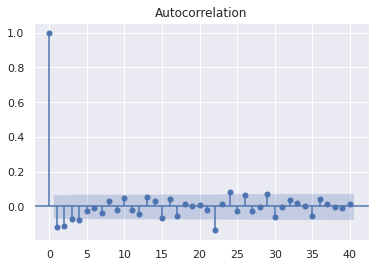

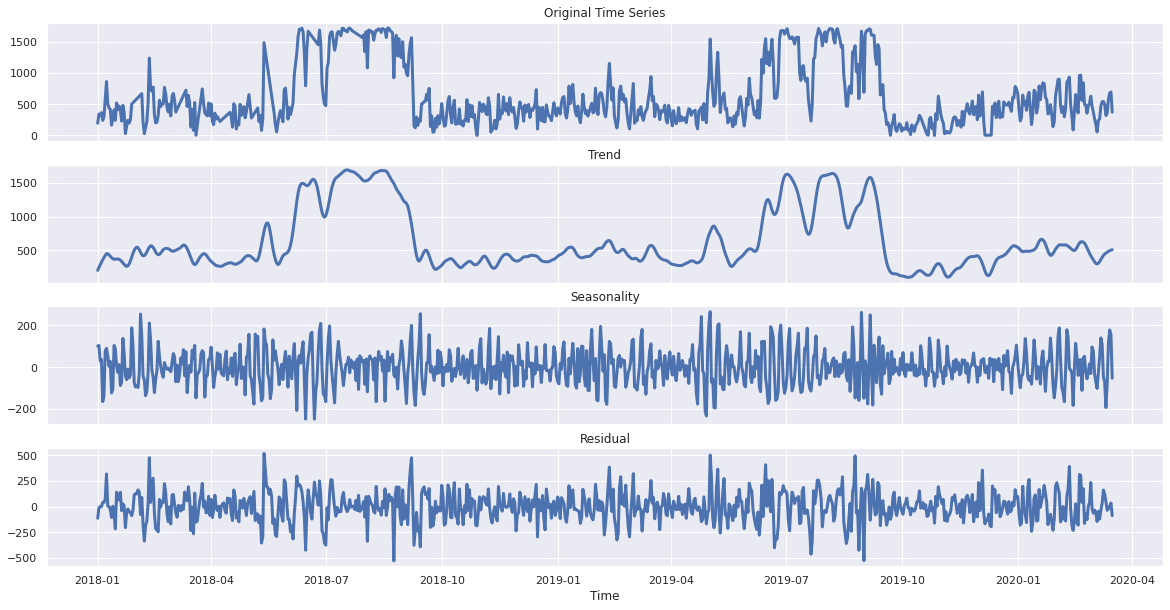

ACF Seasonal Period Detected: [24, 170]
FFT Seasonal Period Detected: [403.0]


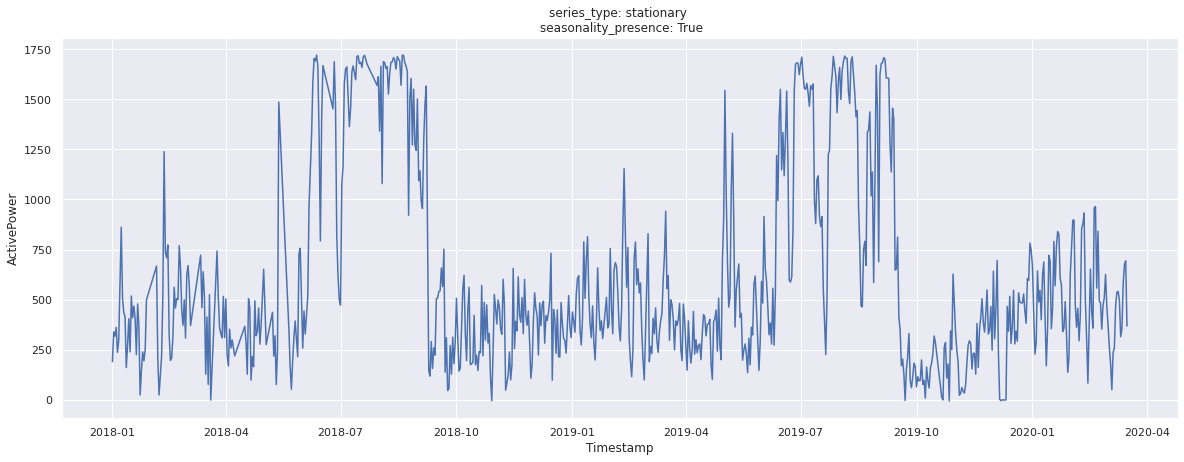

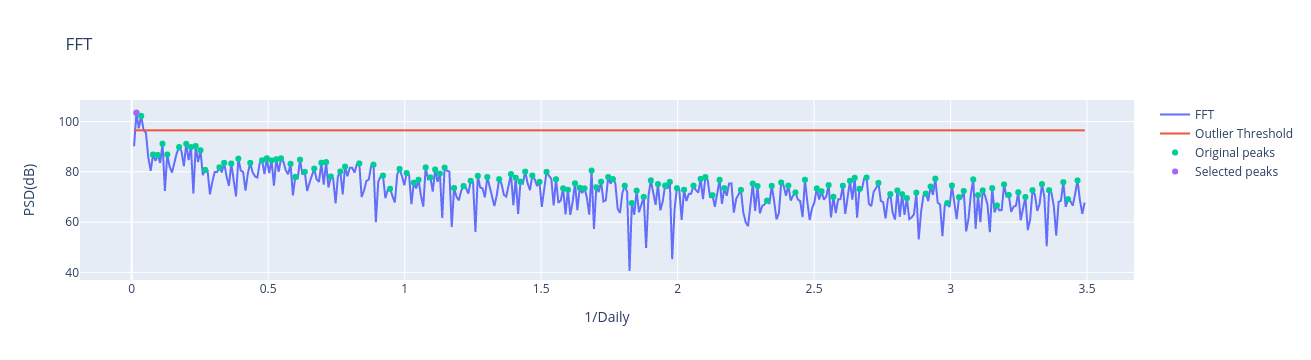

In [35]:
df1 = dd.reset_index()
df1 = df1.rename(columns={"timestamp": "time", "ActivePower": "value"})
df1["time"] = pd.to_datetime(df1['time'])
ts = TimeSeriesData(df1)
fft_detector = FFTDetector(ts)
acf_detector = ACFDetector(ts)
acf_detector.detector(lags=40, diff=1, alpha = 0.05)
acf_detector.remover()
acf_detector.plot()
acf_seasonality_presence = acf_detector.detector(diff=1, alpha = 0.05)
acf_seasonal_period = acf_seasonality_presence['seasonalities']
seasonality_presence = fft_detector.detector()
seasonal_period = seasonality_presence['seasonalities']
print('ACF Seasonal Period Detected:', acf_seasonal_period)
print('FFT Seasonal Period Detected:',seasonal_period)

test_result = []
    # ADF Test
adf_result = adfuller(dd, autolag='AIC')
p_adf = round(adf_result[1],4)
    # KPSS Test
kpss_result = kpss(dd, regression='ct')
p_kpss = round(kpss_result[1],4)
if p_adf > 0.05 and p_kpss < 0.05:
    test_result.append('non stationary')
elif p_adf < 0.05 and p_kpss > 0.05:
    test_result.append('stationary')
elif p_adf > 0.05 and p_kpss > 0.05:
    test_result.append('trend stationary')
else:
    test_result.append('difference stationary')
    
plt.figure(figsize=(20, 7))
plt.plot(dd)
plt.title('series_type: %s \n seasonality_presence: %s' % (test_result.pop(), seasonality_presence.get("seasonality_presence")))
plt.ylabel('ActivePower')
plt.xlabel('Timestamp')
plt.show()
plt.show()
fft_detector.plot('Daily', 7)
fft_detector.plot_fft('Daily', 7)

In [36]:
p_adf

0.0124

In [37]:
p_kpss

0.0769

In [38]:
seasonal_period

[403.0]

#### We see from above that the period repeats after every **403 days**. This shows that there are two periods in the data

In [39]:

data = dd

y = data

h = 7
    
    
length = y.values
length = np.reshape(length, (-1,1))
length = int(length.shape[0])
TrainLength = int(0.8*(length))
TrainingData = y[:TrainLength]
TestData = y[TrainLength:]
TestLength = length - TrainLength



In [40]:
x0 = 0 # start


    # Catch Value Error

fitData = ExponentialSmoothing(TrainingData, seasonal= "additive", seasonal_periods= int(seasonal_period[0]))
modelHW = fitData.fit() 

#### From the error above, we require two full periods data to train the Holts-Winters model but we have less than that in TrainingData.
- An alternative is to train the model with the "TrainingData" but without the other "optional" but helpful hyperparameters(option 1).
- Another alternative is to train the model with all the data set and not reserve any data for test to avoid the error above(option 2). However, this is not a best practice and we risk overfitting the model.

Train Score: 51723.2893 MSE (227.4275 RMSE) 166.4883 MAE
Test Score: 109643.0836 MSE (331.1240 RMSE) 264.1485 MAE


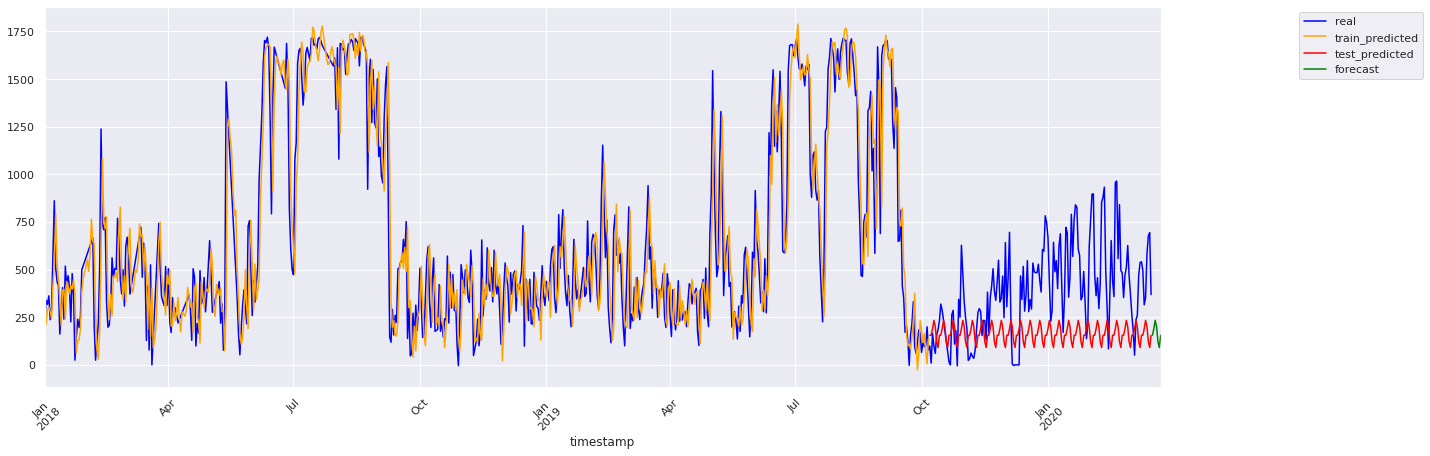

In [41]:
x0 = 0 # start


    # Catch Value Error

fitData = ExponentialSmoothing(TrainingData, seasonal= "additive")     
modelHW = fitData.fit() 
#t1 = time.time()
#print("Time (s): ", t1-t0)
    
        # Predict
fc = modelHW.predict(x0,length+h)
    #fc = fc.to_numpy()
variable = list(y.columns)
prediction_dates = pd.date_range(y.index.min(), periods=length+h, freq="D").tolist()
predictions_df = pd.DataFrame(fc, prediction_dates, columns=[variable[0]])

trainPredicted = predictions_df[:TrainLength]
trainExpected = TrainingData
train_mae = mean_absolute_error(trainExpected, trainPredicted)
train_mse = mean_squared_error(trainExpected, trainPredicted)
train_rmse = np.sqrt(train_mse)
    
    
    
testPredicted = predictions_df[TrainLength:-(h)]
testExpected = TestData
test_mae = mean_absolute_error(testExpected, testPredicted)
test_mse = mean_squared_error(testExpected, testPredicted)
test_rmse = np.sqrt(test_mse)


print('Train Score: %.4f MSE (%.4f RMSE) %.4f MAE' % (train_mse, train_rmse, train_mae))
print('Test Score: %.4f MSE (%.4f RMSE) %.4f MAE' % (test_mse, test_rmse, test_mae))
prediction =predictions_df[-(h):]


variable = list(y.columns)
    # plot baseline and predictions
plt.figure(figsize=(20, 7))
ax1 = y[variable[0]].plot(color='blue', grid=True, label='real')
ax2 = trainPredicted[variable[0]].plot(color='orange', grid=True, label='train_predicted')
ax3 = testPredicted[variable[0]].plot(color='red', grid=True, label='test_predicted')
ax4 = prediction[variable[0]].plot(color='green', grid=True, label='forecast')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.24, 1), loc='upper right')
plt.show()

In [42]:
# 7days prediction with option 1
prediction

ActivePower
2020-03-17   155.344173
2020-03-18   189.112405
2020-03-19   233.261833
2020-03-20   200.205600
2020-03-21   121.502994
2020-03-22    90.488072
2020-03-23   154.828543

Train Score: 25032.3239 MSE (158.2161 RMSE) 120.3953 MAE


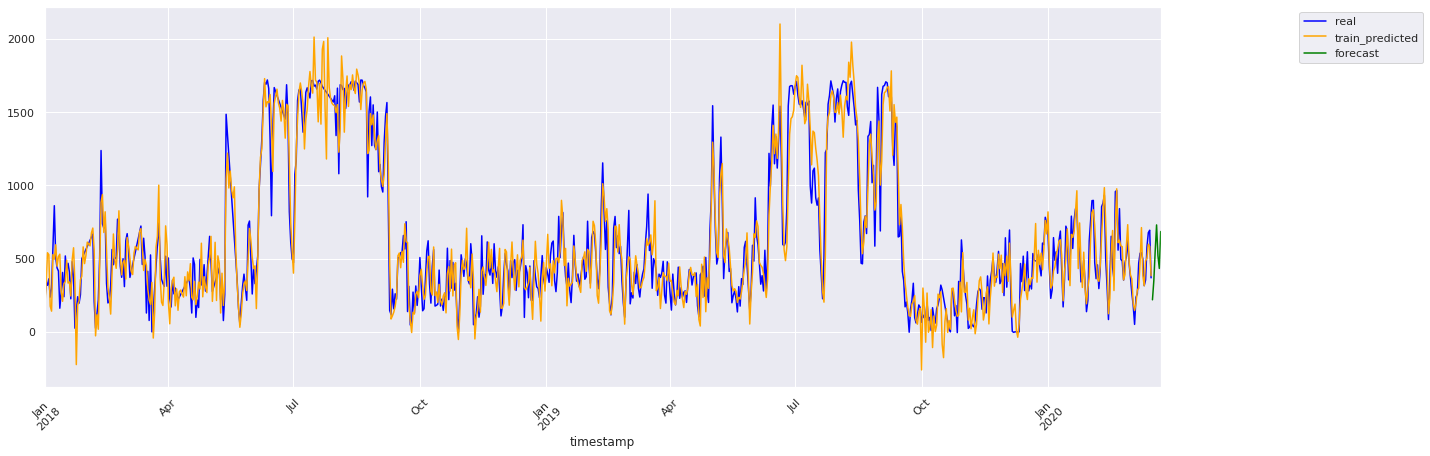

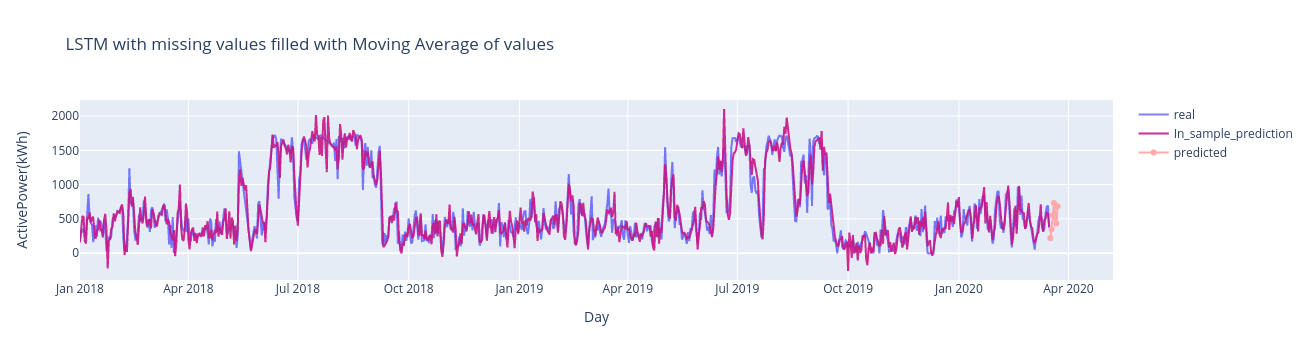

In [43]:
#Option 2
fitData = ExponentialSmoothing(dd, seasonal= "additive", seasonal_periods= int(seasonal_period[0]))
modelHW = fitData.fit() 

        # Predict
fc = modelHW.predict(x0,length+h)
    #fc = fc.to_numpy()
variable = list(y.columns)
prediction_dates = pd.date_range(y.index.min(), periods=length+h, freq="D").tolist()
predictions_df = pd.DataFrame(fc, prediction_dates, columns=[variable[0]])



trainPredicted = predictions_df[:-h]
trainExpected = dd
train_mae = mean_absolute_error(trainExpected, trainPredicted)
train_mse = mean_squared_error(trainExpected, trainPredicted)
train_rmse = np.sqrt(train_mse)
    
    
    



print('Train Score: %.4f MSE (%.4f RMSE) %.4f MAE' % (train_mse, train_rmse, train_mae))
#print('Test Score: %.4f MSE (%.4f RMSE) %.4f MAE' % (test_mse, test_rmse, test_mae))
prediction =predictions_df[-(h):]


variable = list(y.columns)
    # plot baseline and predictions
plt.figure(figsize=(20, 7))
ax1 = y[variable[0]].plot(color='blue', grid=True, label='real')
ax2 = trainPredicted[variable[0]].plot(color='orange', grid=True, label='train_predicted')
#ax3 = testPredicted[variable[0]].plot(color='red', grid=True, label='test_predicted')
ax4 = prediction[variable[0]].plot(color='green', grid=True, label='forecast')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.24, 1), loc='upper right')
plt.show()

fig = go.Figure()
fig.add_trace(go.Scatter(x = data.index, y = data[variable[0]],
        opacity=.5,
        name = 'real',
        line = dict(width = 2,
                            color = 'rgb(0, 0, 255)')))
fig.add_trace(go.Scatter(x = trainPredicted.index, y = trainPredicted[variable[0]],
        opacity=.9,
        name = 'In_sample_prediction',
        line = dict(width = 2,
                    color = 'rgb(199,21,133)')))
fig.add_trace(go.Scatter(x = prediction.index, y = prediction[variable[0]],
        opacity=.9,
        name = 'predicted',
        line = dict(width = 2,
                    color = 'rgb(255,162,163)')))
# Edit the layout
fig.update_layout(title='LSTM with missing values filled with Moving Average of values',
                   xaxis_title='Day',
                   yaxis_title='ActivePower(kWh)')
fig.show()


In [44]:
# 7days prediction with option 2
prediction

ActivePower
2020-03-17   218.455437
2020-03-18   349.106611
2020-03-19   552.137816
2020-03-20   730.030777
2020-03-21   519.538213
2020-03-22   432.586028
2020-03-23   684.685771

- Results of HW would have been improved if the data extends beyond two periods

#### Solving the problem with **LSTM**

In [45]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
def create_dataset(dataset, look_back=1):
    dataX = []
    dataY = []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [46]:
# This implement the prediction
def predict(num_prediction, model, df, look_back):
    prediction_list = df[-look_back:]
    
    for _ in range(num_prediction):
        x = prediction_list[-look_back:]
        x = x.reshape((1, look_back, 1))
        x = np.reshape(x, (x.shape[0], 1, x.shape[1]))
        out = model.predict(x)
        prediction_list = np.append(prediction_list, out)
    prediction_list = prediction_list[look_back-1:]
        
    return prediction_list

# Provides date index for the number of days of prediction
def predict_dates(num_prediction, df):
    last_date = df.index.max()
    prediction_dates = pd.date_range(last_date, periods=num_prediction+1, freq="D").tolist()
    return prediction_dates


2023-07-08 19:11:55.361547: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-08 19:11:55.648836: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-07-08 19:11:55.671220: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2299965000 Hz


Epoch 1/100
32/32 - 2s - loss: 0.0753 - val_loss: 0.0153
Epoch 2/100
32/32 - 0s - loss: 0.0259 - val_loss: 0.0126
Epoch 3/100
32/32 - 0s - loss: 0.0232 - val_loss: 0.0121
Epoch 4/100
32/32 - 0s - loss: 0.0208 - val_loss: 0.0112
Epoch 5/100
32/32 - 0s - loss: 0.0191 - val_loss: 0.0107
Epoch 6/100
32/32 - 0s - loss: 0.0188 - val_loss: 0.0106
Epoch 7/100
32/32 - 0s - loss: 0.0184 - val_loss: 0.0122
Epoch 8/100
32/32 - 0s - loss: 0.0184 - val_loss: 0.0109
Epoch 9/100
32/32 - 0s - loss: 0.0184 - val_loss: 0.0110
Epoch 10/100
32/32 - 0s - loss: 0.0192 - val_loss: 0.0110
Epoch 11/100
32/32 - 0s - loss: 0.0168 - val_loss: 0.0111
Epoch 12/100
32/32 - 0s - loss: 0.0185 - val_loss: 0.0132
Epoch 13/100
32/32 - 0s - loss: 0.0185 - val_loss: 0.0101
Epoch 14/100
32/32 - 0s - loss: 0.0172 - val_loss: 0.0102
Epoch 15/100
32/32 - 0s - loss: 0.0165 - val_loss: 0.0101
Epoch 16/100
32/32 - 0s - loss: 0.0175 - val_loss: 0.0103
Epoch 17/100
32/32 - 0s - loss: 0.0173 - val_loss: 0.0102
Epoch 18/100
32/32 - 0s

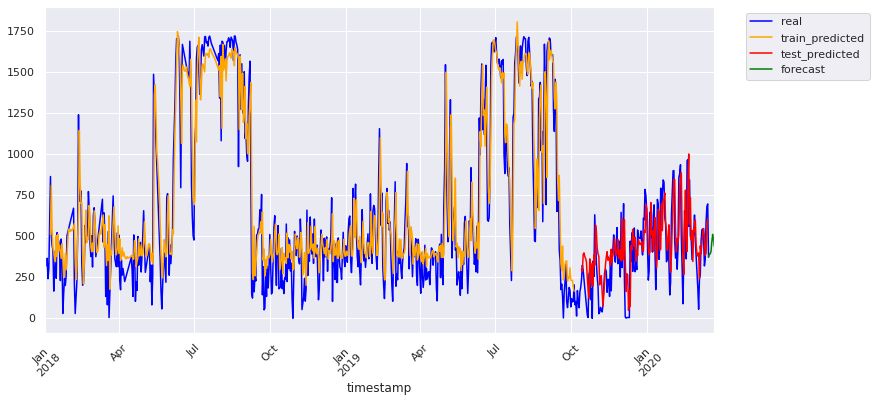

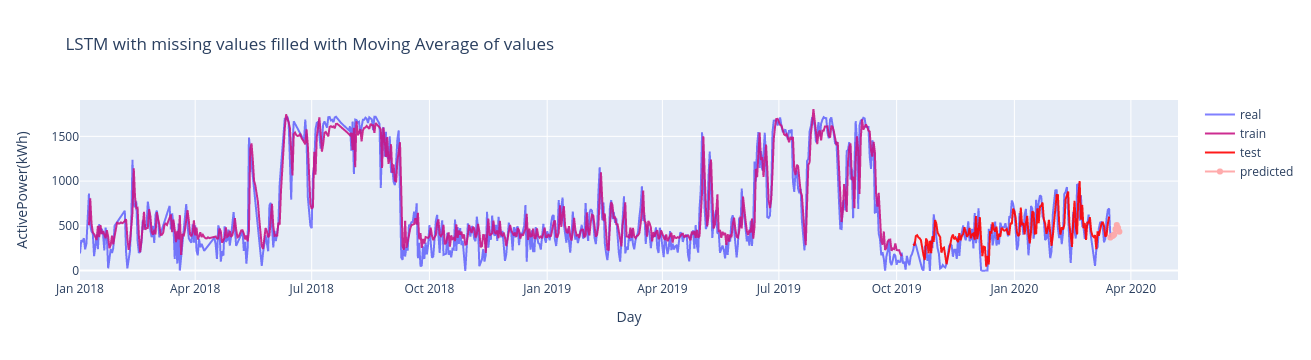

In [47]:
# Using Moving Average for missing values imputation after aggregation
dataset = dataD
    #Moving Average Imputation
data = dataset.interpolate()
variable = 'ActivePower'
dataset = data[variable]
dataset = dataset.to_numpy(dataset)
dataset = dataset.reshape(-1,1)
h = int(dataset.shape[0]*0.1)

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)


# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]




# reshape into X=t and Y=t+1
look_back = 7
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit Multilayer Perceptron model
modelL = Sequential()
modelL.add(LSTM(64, input_dim=look_back))
#model.add(LSTM(units = 64))
modelL.add(Dropout(0.2))
modelL.add(Dense(units = 128, activation='relu'))
modelL.add(Dense(units = 64, activation='relu'))
modelL.add(Dense(units = 1))
modelL.compile(loss= 'mean_squared_error', optimizer= 'adam' )
modelL.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, batch_size=20, verbose=2)

# generate predictions for training
trainPredict = modelL.predict(trainX)
testPredict = modelL.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.4f MSE (%.4f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print( 'Test Score: %.4f MSE (%.4f RMSE)' % (testScore, math.sqrt(testScore)))

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# get data in dataframe
df_train = pd.DataFrame({'predicted_train': trainPredictPlot.flatten()})
ticks = data.index
df_train.index = ticks
df_test = pd.DataFrame({'predicted_test': testPredictPlot.flatten()})
df_test.index = ticks
result = pd.concat([data, df_train.reindex(data.index), df_test.reindex(data.index)], axis=1)


h = 7

forecast_dates = predict_dates(h, data)
forecast = predict(h, modelL, dataset, look_back)
forecast = scaler.inverse_transform(forecast.reshape(-1, 1))
forecast = forecast.flatten()
forecast_df = pd.DataFrame(forecast, forecast_dates, columns=[variable])

predictions = forecast_df[(forecast_df.index >= forecast_df.index.min()) & (forecast_df.index <= forecast_df.index.max())]
prediction_ticks = predictions.index


# plot baseline and predictions
plt.figure(figsize=(12,6))
ax1 = result.ActivePower.plot(color='blue', grid=True, label='real')
ax2 = result.predicted_train.plot(color='orange', grid=True, label='train_predicted')
ax3 = result.predicted_test.plot(color='red', grid=True, label='test_predicted')
ax4 = forecast_df.ActivePower.plot(color='green', grid=True, label='forecast')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.24, 1), loc='upper right')
plt.show()

fig = go.Figure()
fig.add_trace(go.Scatter(x = data.index, y = data[variable],
        opacity=.5,
        name = 'real',
        line = dict(width = 2,
                            color = 'rgb(0, 0, 255)')))
fig.add_trace(go.Scatter(x = df_train.index, y = df_train['predicted_train'],
        opacity=.9,
        name = 'train',
        line = dict(width = 2,
                    color = 'rgb(199,21,133)')))
fig.add_trace(go.Scatter(x = df_test.index, y = df_test['predicted_test'],
        opacity=.9,
        name = 'test',
        line = dict(width = 2,
                    color = 'rgb(255, 0, 0)')))
fig.add_trace(go.Scatter(x = prediction_ticks, y = predictions[variable],
        opacity=.9,
        name = 'predicted',
        line = dict(width = 2,
                    color = 'rgb(255,162,163)')))


# Edit the layout
fig.update_layout(title='LSTM with missing values filled with Moving Average of values',
                   xaxis_title='Day',
                   yaxis_title='ActivePower(kWh)')


fig.show()


In [48]:
predictions

ActivePower
2020-03-16   368.582998
2020-03-17   387.008373
2020-03-18   388.255077
2020-03-19   403.239878
2020-03-20   461.698371
2020-03-21   508.111907
2020-03-22   476.333888
2020-03-23   434.279934

### Now we use the whole data set to train the model and without a validation set and make verbose = 0

Train Score: 197.4109 MSE (14.0503 RMSE)


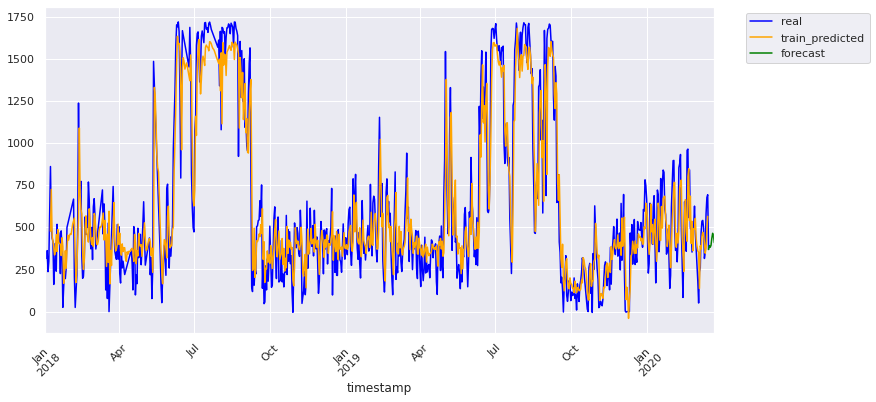

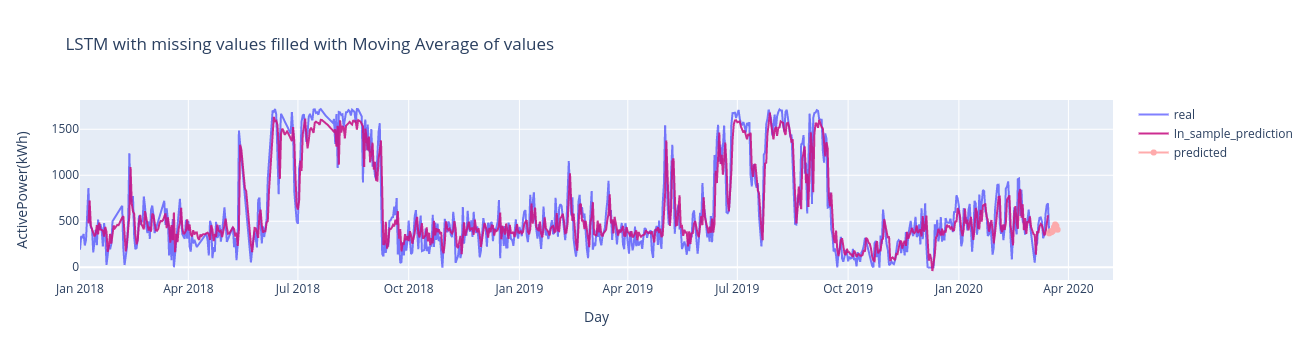

In [49]:



# Using Moving Average for missing values imputation after aggregation
dataset = dataD
#Moving Average Imputation
data = dataset.interpolate()
variable = 'ActivePower'
dataset = data[variable]
dataset = dataset.to_numpy(dataset)
dataset = dataset.reshape(-1,1)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)


# reshape into X=t and Y=t+1
look_back = 7
dataX, dataY = create_dataset(dataset, look_back)

# reshape input to be [samples, time steps, features]
dataX = np.reshape(dataX, (dataX.shape[0], 1, dataX.shape[1]))

# create and fit Multilayer Perceptron model
modelL = Sequential()
modelL.add(LSTM(64, input_dim=look_back))
#model.add(LSTM(units = 64))
modelL.add(Dropout(0.2))
modelL.add(Dense(units = 128, activation='relu'))
modelL.add(Dense(units = 64, activation='relu'))
modelL.add(Dense(units = 1))
modelL.compile(loss= 'mean_squared_error', optimizer= 'adam' )
modelL.fit(dataX, dataY, epochs=100, batch_size=20, verbose=0)

# generate predictions for training
dataYPredict = modelL.predict(dataX)


# invert predictions
dataYPredict = scaler.inverse_transform(dataYPredict)
dataY = scaler.inverse_transform([dataY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(dataY[0], dataYPredict[:,0]))
print('Train Score: %.4f MSE (%.4f RMSE)' % (trainScore, math.sqrt(trainScore)))

# shift train predictions for plotting
dataPredictPlot = np.empty_like(dataset)
dataPredictPlot[:, :] = np.nan
dataPredictPlot[look_back:len(dataYPredict)+look_back, :] = dataYPredict

# get data in dataframe
df_dataY = pd.DataFrame({'predicted_dataY': dataPredictPlot.flatten()})
ticks = data.index
df_dataY.index = ticks
result = pd.concat([data, df_dataY.reindex(data.index)], axis=1)
                    
    
    


# We need to predict for the next seven days
h = 7

forecast_dates = predict_dates(h, data)
forecast = predict(h, modelL, dataset, look_back)
forecast = scaler.inverse_transform(forecast.reshape(-1, 1))
forecast = forecast.flatten()
forecast_df = pd.DataFrame(forecast, forecast_dates, columns=[variable])

predictions = forecast_df[(forecast_df.index >= forecast_df.index.min()) & (forecast_df.index <= forecast_df.index.max())]
prediction_ticks = predictions.index


# plot baseline and predictions
plt.figure(figsize=(12,6))
ax1 = result.ActivePower.plot(color='blue', grid=True, label='real')
ax2 = result.predicted_dataY.plot(color='orange', grid=True, label='train_predicted')
ax4 = forecast_df.ActivePower.plot(color='green', grid=True, label='forecast')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.24, 1), loc='upper right')
plt.show()

fig = go.Figure()
fig.add_trace(go.Scatter(x = data.index, y = data[variable],
        opacity=.5,
        name = 'real',
        line = dict(width = 2,
                            color = 'rgb(0, 0, 255)')))
fig.add_trace(go.Scatter(x = df_dataY.index, y = df_dataY['predicted_dataY'],
        opacity=.9,
        name = 'In_sample_prediction',
        line = dict(width = 2,
                    color = 'rgb(199,21,133)')))
fig.add_trace(go.Scatter(x = prediction_ticks, y = predictions[variable],
        opacity=.9,
        name = 'predicted',
        line = dict(width = 2,
                    color = 'rgb(255,162,163)')))
# Edit the layout
fig.update_layout(title='LSTM with missing values filled with Moving Average of values',
                   xaxis_title='Day',
                   yaxis_title='ActivePower(kWh)')
fig.show()


In [50]:
predictions

ActivePower
2020-03-16   368.582998
2020-03-17   391.887470
2020-03-18   381.553291
2020-03-19   392.937893
2020-03-20   435.090155
2020-03-21   464.824620
2020-03-22   447.741005
2020-03-23   408.614498

In [51]:
#system info
import platform,socket,re,uuid,json,psutil,logging

def getSystemInfo():
    try:
        info={}
        info['platform']=platform.system()
        info['platform-release']=platform.release()
        info['platform-version']=platform.version()
        info['architecture']=platform.machine()
        info['hostname']=socket.gethostname()
        info['ip-address']=socket.gethostbyname(socket.gethostname())
        info['mac-address']=':'.join(re.findall('..', '%012x' % uuid.getnode()))
        info['processor']=platform.processor()
        info['ram']=str(round(psutil.virtual_memory().total / (1024.0 **3)))+" GB"
        return json.dumps(info)
    except Exception as e:
        logging.exception(e)

json.loads(getSystemInfo())

{'platform': 'Linux',
 'platform-release': '5.15.0-75-generic',
 'platform-version': '#82~20.04.1-Ubuntu SMP Wed Jun 7 19:37:37 UTC 2023',
 'architecture': 'x86_64',
 'hostname': 'samuel-ZenBook-UX434FAC-UX433FAC',
 'ip-address': '127.0.1.1',
 'mac-address': 'c9:23:c6:19:0c:63',
 'processor': 'x86_64',
 'ram': '15 GB'}